In [8]:
import  ibm_db

In [9]:
#Replace the placeholder values with your actual Db2 hostname, username, and password:
dsn_hostname = "dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net" # e.g.: "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net"
dsn_uid = "vwh96410"        # e.g. "abc12345"
dsn_pwd = "xmlf04z5l07s0^15"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            # e.g. "BLUDB"
dsn_port = "50000"                # e.g. "50000" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"

In [10]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create the dsn connection string
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

#print the connection string to check correct values are specified
print(dsn)

DRIVER={IBM DB2 ODBC DRIVER};DATABASE=BLUDB;HOSTNAME=dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net;PORT=50000;PROTOCOL=TCPIP;UID=vwh96410;PWD=xmlf04z5l07s0^15;


In [11]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create database connection

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  BLUDB as user:  vwh96410 on host:  dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net


In [33]:
#Table creation


In [34]:
#Lets first drop the table INSTRUCTOR in case it exists from a previous attempt
dropQuery = "drop table INSTRUCTOR"

#Now execute the drop statment
dropStmt = ibm_db.exec_immediate(conn, dropQuery)

In [35]:
#Construct the Create Table DDL statement - replace the ... with rest of the statement
createQuery = "create table INSTRUCTOR(id INTEGER PRIMARY KEY NOT NULL, fname varchar(20) not null, lname varchar(20) not null, city varchar(20) not null, ccode char(2) not null)"

#Now fill in the name of the method and execute the statement
createStmt = ibm_db.exec_immediate(conn, createQuery )

In [36]:
# Insert data

In [37]:
#Construct the query - replace ... with the insert statement
insertQuery = "insert into INSTRUCTOR values (1, 'Rav', 'Ahuja','TORONTO','CA')"

#execute the insert statement
insertStmt = ibm_db.exec_immediate(conn, insertQuery)

In [38]:
#replace ... with the insert statement that inerts the remaining two rows of data
insertQuery2 = "insert into INSTRUCTOR values (3, 'Hima', 'Vasudevan','Chicago','US'),(2, 'Raul', 'Chong','Markham','CA')"

#execute the statement
insertStmt2 = ibm_db.exec_immediate(conn, insertQuery2)

In [39]:
#Query data from the table

In [40]:
#Construct the query that retrieves all rows from the INSTRUCTOR table
selectQuery = "select * from INSTRUCTOR"

#Execute the statement
selectStmt = ibm_db.exec_immediate(conn, selectQuery)

#Fetch the Dictionary (for the first row only) - replace ... with your code
ibm_db.fetch_both(selectStmt)

{'ID': 1,
 0: 1,
 'FNAME': 'Rav',
 1: 'Rav',
 'LNAME': 'Ahuja',
 2: 'Ahuja',
 'CITY': 'TORONTO',
 3: 'TORONTO',
 'CCODE': 'CA',
 4: 'CA'}

In [41]:
#Fetch the rest of the rows and print the ID and FNAME for those rows
while ibm_db.fetch_row(selectStmt) != False:
   print (" ID:",  ibm_db.result(selectStmt, 0), " FNAME:",  ibm_db.result(selectStmt, "FNAME"))


 ID: 3  FNAME: Hima
 ID: 2  FNAME: Raul


In [42]:
#write and execute an update statement that changes the Rav's CITY to MOOSETOWN

In [43]:
updateQuery = "update INSTRUCTOR set CITY='MOOSETOWN' where FNAME='Rav'"
updateStmt = ibm_db.exec_immediate(conn, updateQuery)


In [45]:
import pandas
import ibm_db_dbi

In [46]:
#connection for pandas
pconn = ibm_db_dbi.Connection(conn)

In [47]:
#query statement to retrieve all rows in INSTRUCTOR table
selectQuery = "select * from INSTRUCTOR"

#retrieve the query results into a pandas dataframe
pdf = pandas.read_sql(selectQuery, pconn)

#print just the LNAME for first row in the pandas data frame
pdf.LNAME[0]

'Ahuja'

In [48]:
#print the entire data frame
pdf

,ID,FNAME,LNAME,CITY,CCODE
0,1,Rav,Ahuja,MOOSETOWN,CA
1,3,Hima,Vasudevan,Chicago,US
2,2,Raul,Chong,Markham,CA


In [49]:
ibm_db.close(conn)

True

In [2]:
%load_ext sql

In [3]:
# Enter your Db2 credentials in the connection string below
# Recall you created Service Credentials in Part III of the first lab of the course in Week 1
# i.e. from the uri field in the Service Credentials copy everything after db2:// (but remove the double quote at the end)
# for example, if your credentials are as in the screenshot above, you would write:
# %sql ibm_db_sa://my-username:my-password@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
# Note the ibm_db_sa:// prefix instead of db2://
# This is because JupyterLab's ipython-sql extension uses sqlalchemy (a python SQL toolkit)
# which in turn uses IBM's sqlalchemy dialect: ibm_db_sa
%sql ibm_db_sa://jxf98486:htm0438h84w8r%5E5g@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB

'Connected: jxf98486@BLUDB'

In [ ]:
%%sql

CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);
INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES (country, first_name, last_name, test_score)
VALUES
('United States', 'Marshall', 'Bernadot', 54),
('Ghana', 'Celinda', 'Malkin', 51),
('Ukraine', 'Guillermo', 'Furze', 53),
('Greece', 'Aharon', 'Tunnow', 48),
('Russia', 'Bail', 'Goodwin', 46),
('Poland', 'Cole', 'Winteringham', 49),
('Sweden', 'Emlyn', 'Erricker', 55),
('Russia', 'Cathee', 'Sivewright', 49),
('China', 'Barny', 'Ingerson', 57),
('Uganda', 'Sharla', 'Papaccio', 55),
('China', 'Stella', 'Youens', 51),
('Poland', 'Julio', 'Buesden', 48),
('United States', 'Tiffie', 'Cosely', 58),
('Poland', 'Auroora', 'Stiffell', 45),
('China', 'Clarita', 'Huet', 52),
('Poland', 'Shannon', 'Goulden', 45),
('Philippines', 'Emylee', 'Privost', 50),
('France', 'Madelina', 'Burk', 49),
('China', 'Saunderson', 'Root', 58),
('Indonesia', 'Bo', 'Waring', 55),
('China', 'Hollis', 'Domotor', 45),
('Russia', 'Robbie', 'Collip', 46),
('Philippines', 'Davon', 'Donisi', 46),
('China', 'Cristabel', 'Radeliffe', 48),
('China', 'Wallis', 'Bartleet', 58),
('Moldova', 'Arleen', 'Stailey', 38),
('Ireland', 'Mendel', 'Grumble', 58),
('China', 'Sallyann', 'Exley', 51),
('Mexico', 'Kain', 'Swaite', 46),
('Indonesia', 'Alonso', 'Bulteel', 45),
('Armenia', 'Anatol', 'Tankus', 51),
('Indonesia', 'Coralyn', 'Dawkins', 48),
('China', 'Deanne', 'Edwinson', 45),
('China', 'Georgiana', 'Epple', 51),
('Portugal', 'Bartlet', 'Breese', 56),
('Azerbaijan', 'Idalina', 'Lukash', 50),
('France', 'Livvie', 'Flory', 54),
('Malaysia', 'Nonie', 'Borit', 48),
('Indonesia', 'Clio', 'Mugg', 47),
('Brazil', 'Westley', 'Measor', 48),
('Philippines', 'Katrinka', 'Sibbert', 51),
('Poland', 'Valentia', 'Mounch', 50),
('Norway', 'Sheilah', 'Hedditch', 53),
('Papua New Guinea', 'Itch', 'Jubb', 50),
('Latvia', 'Stesha', 'Garnson', 53),
('Canada', 'Cristionna', 'Wadmore', 46),
('China', 'Lianna', 'Gatward', 43),
('Guatemala', 'Tanney', 'Vials', 48),
('France', 'Alma', 'Zavittieri', 44),
('China', 'Alvira', 'Tamas', 50),
('United States', 'Shanon', 'Peres', 45),
('Sweden', 'Maisey', 'Lynas', 53),
('Indonesia', 'Kip', 'Hothersall', 46),
('China', 'Cash', 'Landis', 48),
('Panama', 'Kennith', 'Digance', 45),
('China', 'Ulberto', 'Riggeard', 48),
('Switzerland', 'Judy', 'Gilligan', 49),
('Philippines', 'Tod', 'Trevaskus', 52),
('Brazil', 'Herold', 'Heggs', 44),
('Latvia', 'Verney', 'Note', 50),
('Poland', 'Temp', 'Ribey', 50),
('China', 'Conroy', 'Egdal', 48),
('Japan', 'Gabie', 'Alessandone', 47),
('Ukraine', 'Devlen', 'Chaperlin', 54),
('France', 'Babbette', 'Turner', 51),
('Czech Republic', 'Virgil', 'Scotney', 52),
('Tajikistan', 'Zorina', 'Bedow', 49),
('China', 'Aidan', 'Rudeyeard', 50),
('Ireland', 'Saunder', 'MacLice', 48),
('France', 'Waly', 'Brunstan', 53),
('China', 'Gisele', 'Enns', 52),
('Peru', 'Mina', 'Winchester', 48),
('Japan', 'Torie', 'MacShirrie', 50),
('Russia', 'Benjamen', 'Kenford', 51),
('China', 'Etan', 'Burn', 53),
('Russia', 'Merralee', 'Chaperlin', 38),
('Indonesia', 'Lanny', 'Malam', 49),
('Canada', 'Wilhelm', 'Deeprose', 54),
('Czech Republic', 'Lari', 'Hillhouse', 48),
('China', 'Ossie', 'Woodley', 52),
('Macedonia', 'April', 'Tyer', 50),
('Vietnam', 'Madelon', 'Dansey', 53),
('Ukraine', 'Korella', 'McNamee', 52),
('Jamaica', 'Linnea', 'Cannam', 43),
('China', 'Mart', 'Coling', 52),
('Indonesia', 'Marna', 'Causbey', 47),
('China', 'Berni', 'Daintier', 55),
('Poland', 'Cynthia', 'Hassell', 49),
('Canada', 'Carma', 'Schule', 49),
('Indonesia', 'Malia', 'Blight', 48),
('China', 'Paulo', 'Seivertsen', 47),
('Niger', 'Kaylee', 'Hearley', 54),
('Japan', 'Maure', 'Jandak', 46),
('Argentina', 'Foss', 'Feavers', 45),
('Venezuela', 'Ron', 'Leggitt', 60),
('Russia', 'Flint', 'Gokes', 40),
('China', 'Linet', 'Conelly', 52),
('Philippines', 'Nikolas', 'Birtwell', 57),
('Australia', 'Eduard', 'Leipelt', 53)

In [ ]:
country = "Canada"
%sql select * from INTERNATIONAL_STUDENT_TEST_SCORES where country = :country

In [ ]:
test_score_distribution = %sql SELECT test_score as "Test Score", count(*) as "Frequency" from INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY test_score;
test_score_distribution

1-4 Analyzing

connect to the database

In [11]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [12]:
# Remember the connection string is of the format:
# %sql ibm_db_sa://my-username:my-password@my-hostname:my-port/my-db-name
# Enter the connection string for your Db2 on Cloud database instance below
# i.e. copy after db2:// from the URI string in Service Credentials of your Db2 instance. Remove the double quotes at the end.
%sql ibm_db_sa://jxf98486:htm0438h84w8r^5g@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB

'Connected: jxf98486@BLUDB'

In [ ]:
import pandas
chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
%sql PERSIST chicago_socioeconomic_data

In [5]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * ibm_db_sa://jxf98486:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


How many rows are in the dataset?

In [6]:
%sql SELECT count(*) FROM chicago_socioeconomic_data;

 * ibm_db_sa://jxf98486:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


1
78


How many community areas in Chicago have a hardship index greater than 50.0?

In [9]:
%sql SELECT count(community_area_name) FROM chicago_socioeconomic_data WHERE hardship_index > 50;

 * ibm_db_sa://jxf98486:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


1
38


In [10]:
%sql SELECT hardship_index FROM chicago_socioeconomic_data WHERE hardship_index = ( SELECT MAX(hardship_index) FROM chicago_socioeconomic_data);

 * ibm_db_sa://jxf98486:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


hardship_index
98.0


Which community area which has the highest hardship index?

In [11]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE hardship_index = ( SELECT MAX(hardship_index) FROM chicago_socioeconomic_data);

 * ibm_db_sa://jxf98486:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Riverdale


In [12]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

 * ibm_db_sa://jxf98486:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


AttributeError: 'JointGrid' object has no attribute 'show'

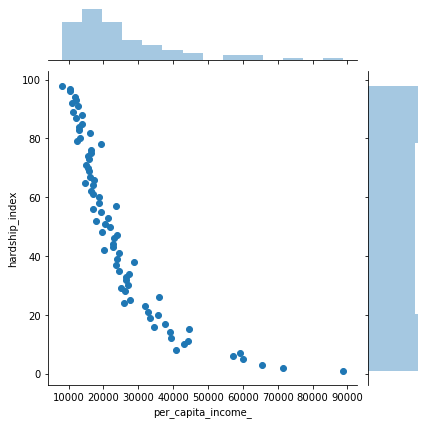

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


plot = sns.jointplot(x = 'per_capita_income_', y ='hardship_index', data = chicago_socioeconomic_data)
plot.show()

negative correlation.
The higher the income, the lower the hardship is.

Ans:

 * ibm_db_sa://jxf98486:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


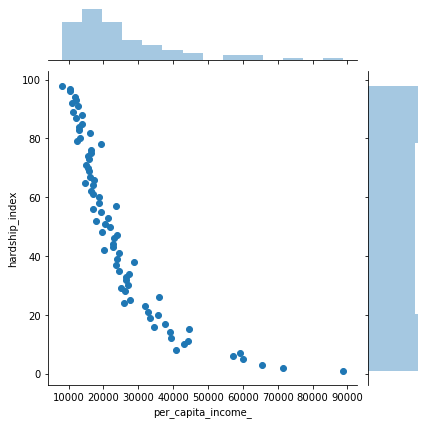

In [15]:

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame());

In [2]:
%load_ext sql

In [3]:
# Enter the connection string for your Db2 on Cloud database instance below
# %sql ibm_db_sa://my-username:my-password@my-hostname:my-port/my-db-name
%sql ibm_db_sa://jxf98486:htm0438h84w8r^5g@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB

'Connected: jxf98486@BLUDB'

In [8]:
%sql SELECT * FROM syscat.tables


UsageError: Line magic function `%sql` not found.


In [13]:
%sql SELECT count(*) FROM chicago_crime;

 * ibm_db_sa://jxf98486:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


1
533


In [14]:
%sql SELECT * FROM chicago_crime limit 10;

 * ibm_db_sa://jxf98486:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


id,case_number,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area_number,fbicode,x_coordinate,y_coordinate,YEAR,latitude,longitude,location
3512276,HK587712,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,FALSE,FALSE,911,9,14,58,6,1155838,1873050,2004,41.80744050,-87.70395585,"(41.8074405, -87.703955849)"
3406613,HK456306,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,FALSE,FALSE,1112,11,27,23,6,1152206,1906127,2004,41.89827996,-87.71640551,"(41.898279962, -87.716405505)"
8002131,HT233595,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,FALSE,FALSE,221,2,3,38,6,1177436,1876313,2011,41.81593313,-87.62464213,"(41.815933131, -87.624642127)"
7903289,HT133522,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,FALSE,FALSE,423,4,7,46,6,1194622,1850125,2010,41.74366532,-87.56246276,"(41.743665322, -87.562462756)"
10402076,HZ138551,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,FALSE,FALSE,831,8,15,66,6,1155240,1860661,2016,41.77345530,-87.70648047,"(41.773455295, -87.706480471)"
7732712,HS540106,006XX W CHICAGO AVE,810,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),FALSE,FALSE,1323,12,27,24,6,1171668,1905607,2010,41.89644677,-87.64493868,"(41.896446772, -87.644938678)"
10769475,HZ534771,050XX N KEDZIE AVE,810,THEFT,OVER $500,STREET,FALSE,FALSE,1713,17,33,14,6,1154133,1933314,2016,41.97284491,-87.70860008,"(41.972844913, -87.708600079)"
4494340,HL793243,005XX E PERSHING RD,860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,TRUE,FALSE,213,2,3,38,6,1180448,1879234,2005,41.82387989,-87.61350386,"(41.823879885, -87.613503857)"
3778925,HL149610,100XX S WASHTENAW AVE,810,THEFT,OVER $500,STREET,FALSE,FALSE,2211,22,19,72,6,1160129,1838040,2005,41.71128051,-87.68917910,"(41.711280513, -87.689179097)"
3324217,HK361551,033XX W BELMONT AVE,820,THEFT,$500 AND UNDER,SMALL RETAIL STORE,FALSE,FALSE,1733,17,35,21,6,1153590,1921084,2004,41.93929582,-87.71092344,"(41.939295821, -87.710923442)"


In [21]:
%sql SELECT count(*) FROM chicago_crime WHERE arrest = 'TRUE';

 * ibm_db_sa://jxf98486:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


1
163


In [22]:
%sql SELECT  DISTINCT count(*) FROM chicago_crime WHERE LOCATION_DESCRIPTION = 'GAS STATION';

 * ibm_db_sa://jxf98486:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


1
6


In [25]:
%sql SELECT  COMMUNITY_AREA_NAME FROM CHICAGO_SOCIOECONOMIC_DATA WHERE COMMUNITY_AREA_NAME LIKE 'B%';

 * ibm_db_sa://jxf98486:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Belmont Cragin
Burnside
Brighton Park
Bridgeport
Beverly


In [27]:
%sql SELECT  NAME_OF_SCHOOL FROM CHICAGO_PUBLIC_SCHOOL WHERE COMMUNITY_AREA_NUMBER BETWEEN 10 and 15;

 * ibm_db_sa://jxf98486:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


name_of_school
Albany Park Multicultural Academy
Alessandro Volta Elementary School
Daniel C Beard Elementary School
Edgebrook Elementary School
Edison Park Elementary School
Edwin G Foreman High School
Ernst Prussing Elementary School
Friedrich W von Steuben Metropolitan Science High School
Hannah G Solomon Elementary School
Helge A Haugan Elementary School


In [28]:
%sql SELECT  avg(SAFETY_SCORE) FROM CHICAGO_PUBLIC_SCHOOL;

 * ibm_db_sa://jxf98486:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


1
49.504873


In [18]:
%sql SELECT AVG(COLLEGE_ENROLLMENT), COMMUNITY_AREA_NAME  FROM CHICAGO_PUBLIC_SCHOOL GROUP BY COMMUNITY_AREA_NAME ORDER BY AVG(COLLEGE_ENROLLMENT) DESC LIMIT 5;

 * ibm_db_sa://jxf98486:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


1,community_area_name
2411.500000,ARCHER HEIGHTS
1317.000000,MONTCLARE
1233.333333,WEST ELSDON
1205.875000,BRIGHTON PARK
1198.833333,BELMONT CRAGIN


In [19]:
%sql SELECT community_area_name FROM chicago_public_school WHERE safety_score = (SELECT min(safety_score) FROM chicago_public_school);

 * ibm_db_sa://jxf98486:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
WASHINGTON PARK


In [7]:
%sql SELECT chicago_public_school.community_area_name, chicago_socioeconomic_data.per_capita_income FROM chicago_public_school, chicago_socioeconomic_data LEFT JOIN chicago_public_school ON chicago_socioeconomic_data.community_area_number =  chicago_public_school.community_area_number WHERE chicago_public_school.safety_score = 1; 

 * ibm_db_sa://jxf98486:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: SQLNumResultCols failed: [IBM][CLI Driver][DB2/LINUXX8664] SQL0203N  A reference to column "CHICAGO_PUBLIC_SCHOOL.COMMUNITY_AREA_NAME" is ambiguous.  SQLSTATE=42702 SQLCODE=-203
[SQL: SELECT chicago_public_school.community_area_name, chicago_socioeconomic_data.per_capita_income FROM chicago_public_school, chicago_socioeconomic_data LEFT JOIN chicago_public_school ON chicago_socioeconomic_data.community_area_name =  chicago_public_school.community_area_name WHERE chicago_public_school.safety_score = 1;]
(Background on this error at: http://sqlalche.me/e/f405)


In [10]:
SELECT chicago_public_school.community_area_name, chicago_socioeconomic_data.per_capita_income
FROM chicago_public_school, chicago_socioeconomic_data
FULL OUTER JOIN chicago_socioeconomic_data
ON chicago_public_school.community_area_name = chicago_socioeconomic_data.community_area_name
WHERE chicago_public_school.safety_score = 1;

SyntaxError: invalid syntax (<ipython-input-10-844e744be12f>, line 1)

use join

In [ ]:
SELECT chicago_public_school.community_area_name, chicago_socioeconomic_data.per_capita_income FROM chicago_public_school, chicago_socioeconomic_data
FULL OUTER JOIN chicago_socioeconomic_data
ON chicago_public_school.community_area_name = chicago_socioeconomic_data.community_area_name
WHERE chicago_public_school.safety_score = 1;